In [20]:
import pandas as pd

df = pd.read_csv('../data/imputed_dataset.csv')

df.head()

,rating,ranking,year,position,height,weight,latitude,longitude,stars,committed_to,...,latitude_school,longitude_school,wins_rolling_2year,games_played_rolling_2year,post_season_wins_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles,side_of_ball,position_group
0,0.9644,71.0,2012,DT,76.0,290.0,35.334011,-81.865103,4,Clemson,...,34.678774,-82.843243,16.0,27.0,0.0,128.0,0.846154,71.511790,defense,d_line
1,0.9632,79.0,2012,WR,71.0,175.0,35.227200,-80.843083,4,Clemson,...,34.678774,-82.843243,16.0,27.0,0.0,128.0,0.846154,119.438575,offense,pass_catcher
2,0.9567,92.0,2012,S,73.0,195.0,30.438083,-84.280933,4,Clemson,...,34.678774,-82.843243,16.0,27.0,0.0,128.0,0.846154,304.721993,defense,d_backfield
3,0.9264,187.0,2012,DUAL,75.0,205.0,42.886717,-78.878392,4,Clemson,...,34.678774,-82.843243,16.0,27.0,0.0,128.0,0.846154,605.799029,offense,qb
4,0.9133,231.0,2012,ATH,73.0,180.0,35.842865,-90.703452,4,Clemson,...,34.678774,-82.843243,16.0,27.0,0.0,128.0,0.846154,450.556207,athlete,athlete


In [21]:
conference_group = {'SEC': 'power_5', 'Big Ten': 'power_5', 'ACC': 'power_5', 'Big 12': 'power_5'
                  , 'FBS Independents': 'ind', 'Mountain West': 'group_5'
                  , 'Pac-12': 'power_5', 'Mid-American': 'group_5', 'American Athletic': 'group_5'
                  , 'Sun Belt': 'group_5', 'Conference USA': 'group_5'}

df["conf_group"] = df["conference"].map(conference_group)

In [22]:
quant_cols = ['rating', 'ranking', 'height', 'weight', 'distance_miles', 'latitude', 'longitude', 'wins_rolling_2year', 
              'post_season_wins_rolling_2year', 'point_diff_rolling_2year', 'win_pct_rolling_2year']

In [24]:
df_quant = df[quant_cols]
df_quant.head()

,rating,ranking,height,weight,distance_miles,latitude,longitude,wins_rolling_2year,post_season_wins_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year
0,0.9644,71.0,76.0,290.0,71.511790,35.334011,-81.865103,16.0,0.0,128.0,0.846154
1,0.9632,79.0,71.0,175.0,119.438575,35.227200,-80.843083,16.0,0.0,128.0,0.846154
2,0.9567,92.0,73.0,195.0,304.721993,30.438083,-84.280933,16.0,0.0,128.0,0.846154
3,0.9264,187.0,75.0,205.0,605.799029,42.886717,-78.878392,16.0,0.0,128.0,0.846154
4,0.9133,231.0,73.0,180.0,450.556207,35.842865,-90.703452,16.0,0.0,128.0,0.846154


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
    
# Standardize the selected columns
df_quant_scaled = scaler.fit_transform(df_quant)

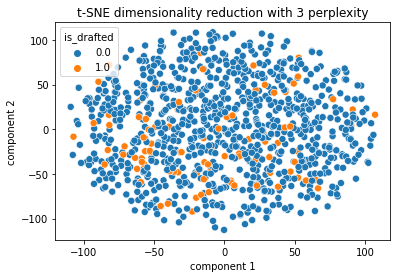

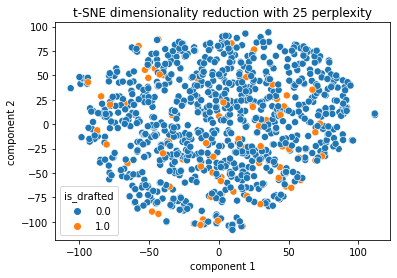

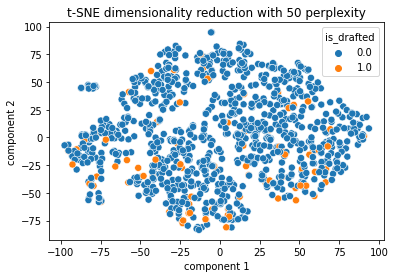

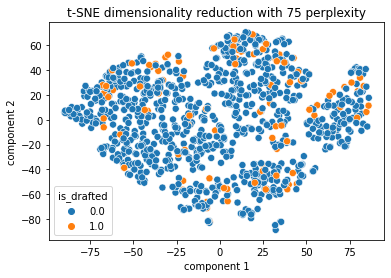

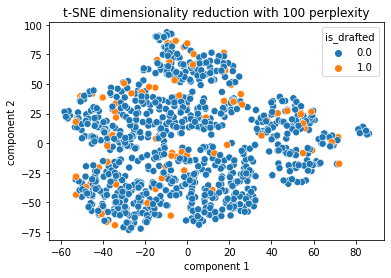

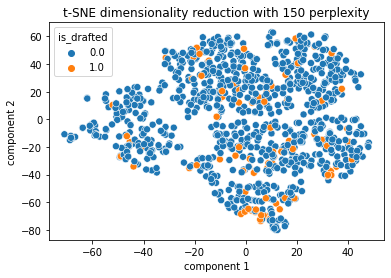

In [26]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

perplexity = [3, 25, 50, 75, 100, 150]

for p in perplexity:

    # t-SNE dim reduction
    X_embedded = TSNE(n_components=2, learning_rate='auto',
                      init='random', perplexity=p).fit_transform(df_quant_scaled)
    
    # Plot
    color = 'is_drafted'
    
    X_emb_df = pd.DataFrame(X_embedded, columns = ['component 1', 'component 2'])
    X_emb_df[color] = df[color]
    
    X_plot = X_emb_df.sample(1000)
    
    sns.scatterplot(x=X_plot['component 1'], y=X_plot['component 2'], hue=X_plot[color], palette='tab10', s=50)
        
    # Add labels and title
    plt.title("t-SNE dimensionality reduction with " + str(p) + " perplexity")
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    
    # Show the plot
    plt.show()


In [ ]:
# p = 100
# t-SNE dim reduction
# X_embedded = TSNE(n_components=2, learning_rate='auto',
#                   init='random', perplexity=p).fit_transform(df_quant_scaled)

In [ ]:
df.columns

In [28]:
df.head()

,rating,ranking,year,position,height,weight,latitude,longitude,stars,committed_to,...,longitude_school,wins_rolling_2year,games_played_rolling_2year,post_season_wins_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles,side_of_ball,position_group,conf_group
0,0.9644,71.0,2012,DT,76.0,290.0,35.334011,-81.865103,4,Clemson,...,-82.843243,16.0,27.0,0.0,128.0,0.846154,71.511790,defense,d_line,power_5
1,0.9632,79.0,2012,WR,71.0,175.0,35.227200,-80.843083,4,Clemson,...,-82.843243,16.0,27.0,0.0,128.0,0.846154,119.438575,offense,pass_catcher,power_5
2,0.9567,92.0,2012,S,73.0,195.0,30.438083,-84.280933,4,Clemson,...,-82.843243,16.0,27.0,0.0,128.0,0.846154,304.721993,defense,d_backfield,power_5
3,0.9264,187.0,2012,DUAL,75.0,205.0,42.886717,-78.878392,4,Clemson,...,-82.843243,16.0,27.0,0.0,128.0,0.846154,605.799029,offense,qb,power_5
4,0.9133,231.0,2012,ATH,73.0,180.0,35.842865,-90.703452,4,Clemson,...,-82.843243,16.0,27.0,0.0,128.0,0.846154,450.556207,athlete,athlete,power_5


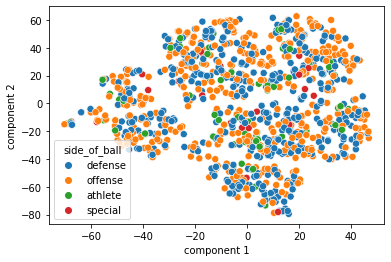

In [35]:
# Plot
color = 'side_of_ball'

X_emb_df = pd.DataFrame(X_embedded, columns = ['component 1', 'component 2'])
X_emb_df[color] = df[color]

X_plot = X_emb_df.sample(1000)

sns.scatterplot(x=X_plot['component 1'], y=X_plot['component 2'], hue=X_plot[color], palette='tab10', s=50)
    
# Add labels and title
# plt.title(f'Scatter Plot of {y_col} vs {x_col} Colored by {color_col}')
plt.xlabel('component 1')
plt.ylabel('component 2')

# Show the plot
plt.show()

In [ ]:
# Plot
color = 'conf_group'

X_emb_df = pd.DataFrame(X_embedded, columns = ['component 1', 'component 2'])
X_emb_df[color] = df[color]

plot_data = X_emb_df.sample(2000)

alt.Chart(plot_data).mark_circle().encode(
    x = 'component 1'
  , y = 'component 2'
  , color = color + ":N", opacity = alt.value(1)).properties(
    height = 300, width = 400)

In [ ]:
df.columns

In [ ]:
X_plot = X_emb_df.sample(1000)

sns.scatterplot(x=X_plot['component 1'], y=X_plot['component 2'], hue=X_plot[color], palette='tab10', s=50)
    
# Add labels and title
# plt.title(f'Scatter Plot of {y_col} vs {x_col} Colored by {color_col}')
plt.xlabel('component 1')
plt.ylabel('component 2')

# Show the plot
plt.show()

In [ ]:
df.columns

In [ ]:
charts = []
# for i in ['conference', 'position_group', 'position', 'is_drafted']:

color = 'position_group'
    
    
X_emb_df = pd.DataFrame(X_embedded, columns = ['component 1', 'component 2'])
X_emb_df[color] = df[color]

X_emb_df = X_emb_df.sample(1000)

alt.Chart(X_emb_df).mark_circle().encode(
    x = 'component 1', y = 'component 2', color = color
)



In [ ]:
import altair as alt

for i in ['conference', 'position_group', 'position', 'is_drafted']:

    color = i
    n_samples = 1000

    X_emb_df = pd.DataFrame(X_embedded, columns = ['component 1', 'component 2'])
    X_emb_df[color] = df[color]

    chart = alt.Chart(X_emb_df).mark_circle().encode(
        x = 'component 1', y = 'component 2'
        , color = i
    )  

    

    
        

In [ ]:
chart